Project 1 Submission

* Student name: Jenny Kreiger
* Student pace: full time
* Scheduled project review date/time: Tuesday, 10/15/19, 08:30 PDT
* Instructor name: Victor Geislinger
* Blog post URL: 

# Get the data

In [1]:
# Import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

import scipy.stats as stats
import sqlite3

from welch_functions import *

import warnings
warnings.simplefilter("ignore")

In [2]:
# Set up connection to the database
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [3]:
cur.execute("""
    SELECT * 
    FROM orderdetail;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


# EDA

In [4]:
df.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,0.056167
std,241.378032,22.159019,29.827418,19.022047,0.083450
min,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,10862.500000,60.000000,32.000000,30.000000,0.100000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


In [5]:
df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

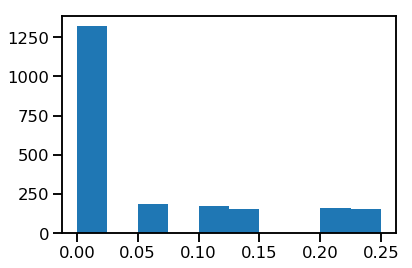

In [6]:
plt.hist(df.Discount);

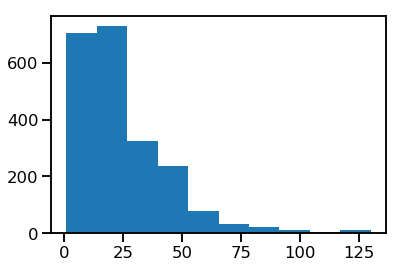

In [7]:
plt.hist(df.Quantity);

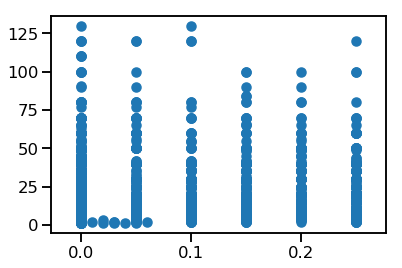

In [8]:
plt.scatter(df.Discount, df.Quantity);

In [9]:
len(df[df.Discount > 0])

838

In [10]:
df_no_discount = df[df.Discount == 0]
df_discount = df[df.Discount != 0]

In [11]:
df_no_discount.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.0
mean,10662.791951,41.396355,26.171534,21.715262,0.0
std,244.835366,22.217410,29.717354,17.507493,0.0
min,10248.000000,1.000000,2.000000,1.000000,0.0
25%,10448.000000,23.000000,12.000000,10.000000,0.0
50%,10671.000000,41.000000,18.400000,18.000000,0.0
75%,10879.000000,60.000000,32.800000,30.000000,0.0
max,11077.000000,77.000000,263.500000,130.000000,0.0


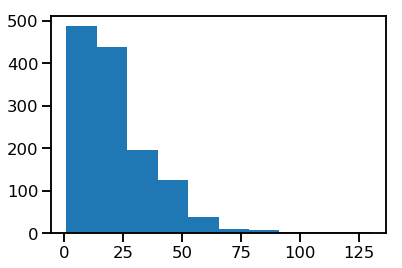

In [12]:
plt.hist(df_no_discount.Quantity);

In [13]:
df_discount.describe()

,OrderId,ProductId,UnitPrice,Quantity,Discount
count,838.000000,838.000000,838.000000,838.000000,838.000000
mean,10654.007160,39.844869,26.292363,27.109785,0.144439
std,235.887125,22.046812,30.017214,20.771439,0.071808
min,10250.000000,1.000000,2.000000,1.000000,0.010000
25%,10452.250000,21.000000,12.500000,12.000000,0.100000
50%,10645.000000,40.000000,18.000000,20.000000,0.150000
75%,10847.000000,59.000000,31.230000,36.000000,0.200000
max,11077.000000,77.000000,263.500000,130.000000,0.250000


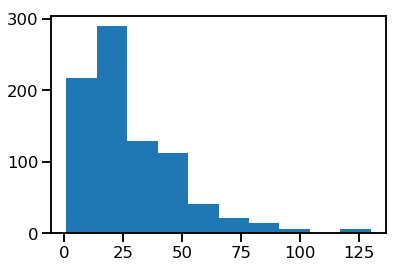

In [14]:
plt.hist(df_discount.Quantity);

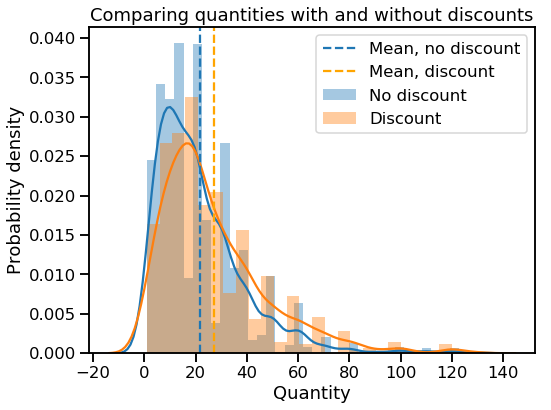

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(df_no_discount.Quantity, label='No discount')
sns.distplot(df_discount.Quantity, label='Discount')
plt.title('Comparing quantities with and without discounts')
plt.axvline(x=np.mean(df_no_discount.Quantity), linestyle='--', label='Mean, no discount')
plt.axvline(x=np.mean(df_discount.Quantity), linestyle='--', color='orange', label='Mean, discount')
plt.legend()
plt.ylabel('Probability density')
plt.show();

In [16]:
print('Control mean:', np.mean(df_no_discount.Quantity))
print('Control n:', len(df_no_discount))
print('Control sigma:', np.var(df_no_discount.Quantity))
print('Control std:', np.std(df_no_discount.Quantity))
print('Discount mean:', np.mean(df_discount.Quantity))
print('Discount n:', len(df_discount))
print('Discount sigma:', np.var(df_discount.Quantity))
print('Discount std:', np.std(df_discount.Quantity))

Control mean: 21.715261958997722
Control n: 1317
Control sigma: 306.2795924332757
Control std: 17.500845477669806
Discount mean: 27.10978520286396
Discount n: 838
Discount sigma: 430.93782787748984
Discount std: 20.759042075141373


# Extra EDA

In [17]:
# grouped = df.groupby('OrderId')
# order_totals = [group['UnitPrice'] * group['Quantity'] for group in grouped]
# order_totals

In [18]:
df[df.Discount == 0.05]['UnitPrice'].mean()

30.796324324324324

In [19]:
df[df.Discount == 0.25]['UnitPrice'].mean()

28.21441558441558

In [20]:
discounts = [0.05, 0.1, 0.15, 0.2, 0.25]

for discount in discounts:
    mean = df[df.Discount == discount]['UnitPrice'].mean()
    print('Mean unit price at {}% discount is ${}'.format(discount, round(mean, 2)))

Mean unit price at 0.05% discount is $30.8
Mean unit price at 0.1% discount is $25.17
Mean unit price at 0.15% discount is $22.98
Mean unit price at 0.2% discount is $23.53
Mean unit price at 0.25% discount is $28.21


In [21]:
cur.execute("""
    SELECT *
    FROM Category 
            ;""")
tables = pd.DataFrame(cur.fetchall())
tables.columns = [x[0] for x in cur.description]
tables



,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [22]:
cur.execute("""
    SELECT o.OrderID, o.ProductID, o.UnitPrice, o.Quantity, o.Discount,
        p.ProductName, c.ID AS CategoryID, c.CategoryName
    FROM OrderDetail o
        JOIN Product p
            ON o.ProductID = p.ID
        JOIN Category c
            ON p.CategoryID = c.ID
            ;""")
order_cat = pd.DataFrame(cur.fetchall())
order_cat.columns = [x[0] for x in cur.description]
order_cat

,OrderId,ProductId,UnitPrice,Quantity,Discount,ProductName,CategoryID,CategoryName
0,10248,11,14.00,12,0.00,Queso Cabrales,4,Dairy Products
1,10248,42,9.80,10,0.00,Singaporean Hokkien Fried Mee,5,Grains/Cereals
2,10248,72,34.80,5,0.00,Mozzarella di Giovanni,4,Dairy Products
3,10249,14,18.60,9,0.00,Tofu,7,Produce
4,10249,51,42.40,40,0.00,Manjimup Dried Apples,7,Produce
...,...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,Wimmers gute Semmelknödel,5,Grains/Cereals
2151,11077,66,17.00,1,0.00,Louisiana Hot Spiced Okra,2,Condiments
2152,11077,73,15.00,2,0.01,Röd Kaviar,8,Seafood
2153,11077,75,7.75,4,0.00,Rhönbräu Klosterbier,1,Beverages


In [23]:
order_cat['ProductPrice'] = order_cat.UnitPrice * order_cat.Quantity
order_cat.head()

,OrderId,ProductId,UnitPrice,Quantity,Discount,ProductName,CategoryID,CategoryName,ProductPrice
0,10248,11,14.0,12,0.0,Queso Cabrales,4,Dairy Products,168.0
1,10248,42,9.8,10,0.0,Singaporean Hokkien Fried Mee,5,Grains/Cereals,98.0
2,10248,72,34.8,5,0.0,Mozzarella di Giovanni,4,Dairy Products,174.0
3,10249,14,18.6,9,0.0,Tofu,7,Produce,167.4
4,10249,51,42.4,40,0.0,Manjimup Dried Apples,7,Produce,1696.0


In [24]:
order_cat.CategoryID.value_counts()

1    404
4    366
3    334
8    330
2    216
5    196
6    173
7    136
Name: CategoryID, dtype: int64

In [25]:
order_cat.groupby('CategoryName')['Discount'].value_counts()

CategoryName    Discount
Beverages       0.00        246
                0.20         39
                0.15         36
                0.25         32
                0.05         26
                0.10         25
Condiments      0.00        131
                0.10         23
                0.05         19
                0.15         17
                0.20         14
                0.25         11
                0.02          1
Confections     0.00        200
                0.10         30
                0.05         29
                0.15         29
                0.25         27
                0.20         17
                0.03          1
                0.04          1
Dairy Products  0.00        224
                0.05         40
                0.20         28
                0.15         26
                0.10         25
                0.25         22
                0.06          1
Grains/Cereals  0.00        133
                0.05         17
               

In [26]:
order_cat.groupby('CategoryName')['Quantity'].sum()

CategoryName
Beverages         9532
Condiments        5298
Confections       7906
Dairy Products    9149
Grains/Cereals    4562
Meat/Poultry      4199
Produce           2990
Seafood           7681
Name: Quantity, dtype: int64

NameError: name 'df_discount_10' is not defined

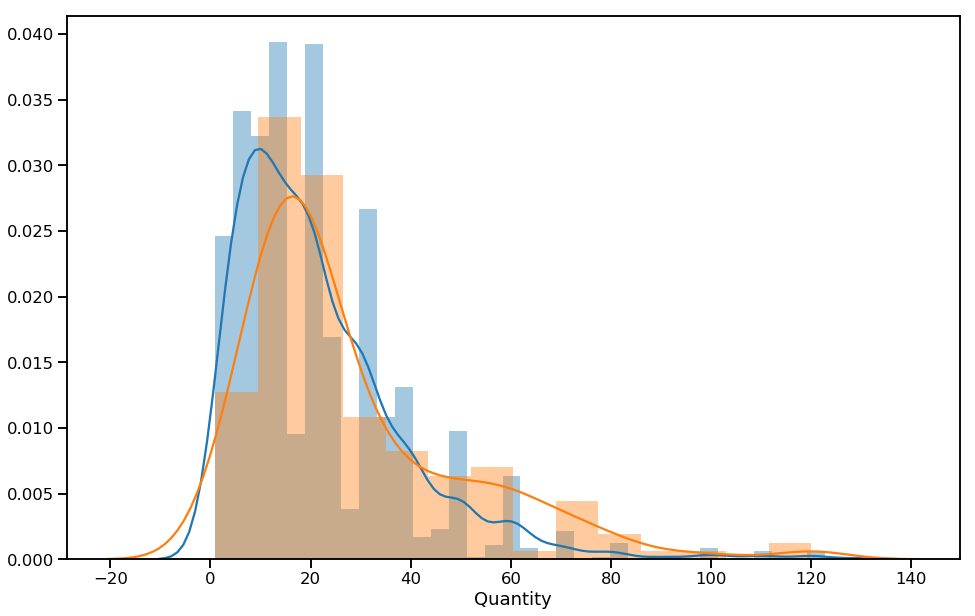

In [31]:
plt.figure(figsize=(16, 10))
sns.distplot(df_no_discount.Quantity, label='No discount')
sns.distplot(df_discount_5.Quantity, label='5% discount')
sns.distplot(df_discount_10.Quantity, label='10% discount')
sns.distplot(df_discount_15.Quantity, label='15% discount')
sns.distplot(df_discount_20.Quantity, label='20% discount')
sns.distplot(df_discount_25.Quantity, label='25% discount')
plt.legend()
plt.title('Comparing quantities across various discount levels')
plt.ylabel('Probability density')
plt.show();

# Hypothesis test 1

I'm doing a one-tailed hypothesis test to see if the mean quantity is greater when there is a discount than when there is not.

H0: mean(df_no_discount.Quantity) == mean(df_discount.Quantity)

Ha: mean(df_no_discount.Quantity) < mean(df_discount.Quantity)

alpha = 0.05

power = 0.8

In [28]:
from welch_functions import *

p_value_welch_ttest(df_no_discount.Quantity, df_discount.Quantity, two_sided=False)

2.8282065578366655e-10

In [29]:
effect_size = np.mean(df_discount.Quantity) - np.mean(df_no_discount.Quantity)
print('Effect size: ', effect_size)

Effect size:  5.394523243866239


This very small p-value means that there is a statistically significant difference between quantities ordered with no discount v. with discount (we reject the null hypothesis).

At what level of discount does this become true? What is the minimum discount we could offer that would have a significant, positive impact on quantities ordered?

## Testing the various discount levels

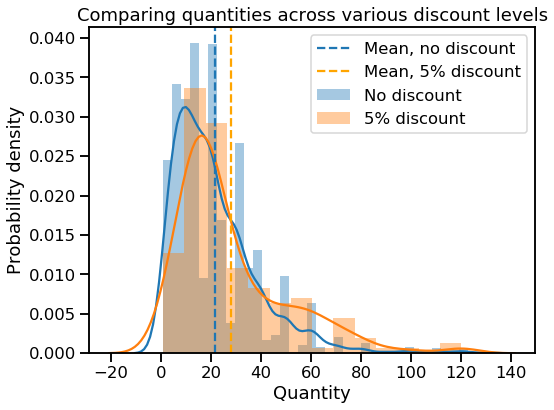

In [30]:
# discounts = [0.05, 0.1, 0.15, 0.2, 0.25]

# for discount in discounts:
df_discount_5 = df_discount[df_discount.Discount == 0.05]    
p_val_5 = p_value_welch_ttest(df_no_discount.Quantity, df_discount_5.Quantity, two_sided=False)

plt.figure(figsize=(8,6))
sns.distplot(df_no_discount.Quantity, label='No discount')
sns.distplot(df_discount_5.Quantity, label='5% discount')
plt.axvline(x=np.mean(df_no_discount.Quantity), linestyle='--', label='Mean, no discount')
plt.axvline(x=np.mean(df_discount_5.Quantity), linestyle='--', color='orange', label='Mean, 5% discount')
plt.legend()
plt.title('Comparing quantities across various discount levels')
plt.ylabel('Probability density')
plt.show();

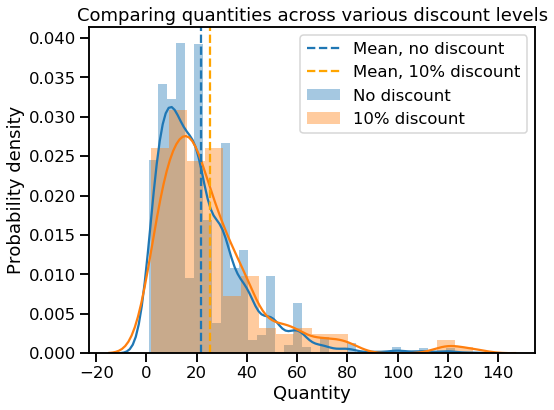

In [32]:
df_discount_10 = df_discount[df_discount.Discount == 0.1]    
p_val_10 = p_value_welch_ttest(df_no_discount.Quantity, df_discount_10.Quantity, two_sided=False)

plt.figure(figsize=(8,6))
sns.distplot(df_no_discount.Quantity, label='No discount')
sns.distplot(df_discount_10.Quantity, label='10% discount')
plt.axvline(x=np.mean(df_no_discount.Quantity), linestyle='--', label='Mean, no discount')
plt.axvline(x=np.mean(df_discount_10.Quantity), linestyle='--', color='orange', label='Mean, 10% discount')
plt.legend()
plt.title('Comparing quantities across various discount levels')
plt.ylabel('Probability density')
plt.show();

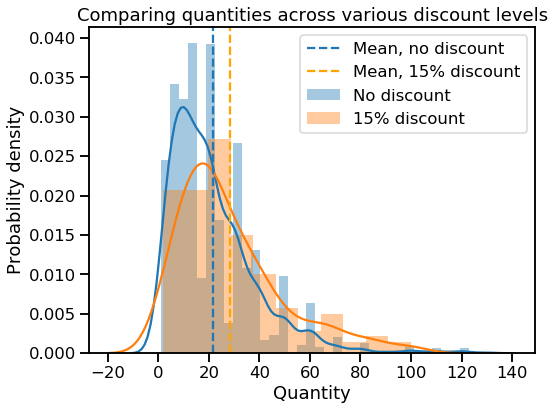

In [33]:
df_discount_15 = df_discount[df_discount.Discount == 0.15]    
p_val_15 = p_value_welch_ttest(df_no_discount.Quantity, df_discount_15.Quantity, two_sided=False)

plt.figure(figsize=(8,6))
sns.distplot(df_no_discount.Quantity, label='No discount')
sns.distplot(df_discount_15.Quantity, label='15% discount')
plt.axvline(x=np.mean(df_no_discount.Quantity), linestyle='--', label='Mean, no discount')
plt.axvline(x=np.mean(df_discount_15.Quantity), linestyle='--', color='orange', label='Mean, 15% discount')
plt.legend()
plt.title('Comparing quantities across various discount levels')
plt.ylabel('Probability density')
plt.show();

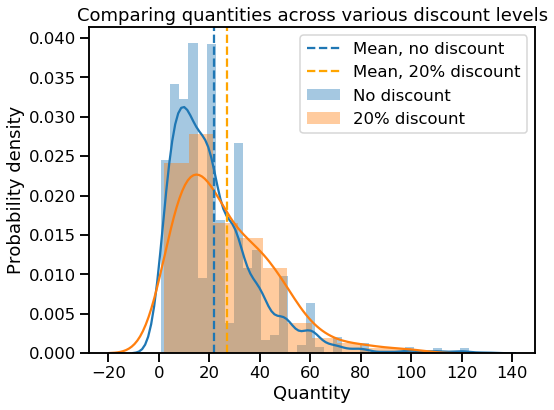

In [34]:
df_discount_20 = df_discount[df_discount.Discount == 0.2]    
p_val_20 = p_value_welch_ttest(df_no_discount.Quantity, df_discount_20.Quantity, two_sided=False)

plt.figure(figsize=(8,6))
sns.distplot(df_no_discount.Quantity, label='No discount')
sns.distplot(df_discount_20.Quantity, label='20% discount')
plt.axvline(x=np.mean(df_no_discount.Quantity), linestyle='--', label='Mean, no discount')
plt.axvline(x=np.mean(df_discount_20.Quantity), linestyle='--', color='orange', label='Mean, 20% discount')
plt.legend()
plt.title('Comparing quantities across various discount levels')
plt.ylabel('Probability density')
plt.show();

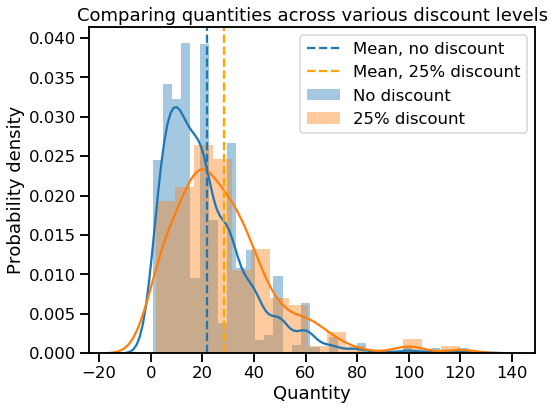

In [35]:
df_discount_25 = df_discount[df_discount.Discount == 0.25]    
p_val_25 = p_value_welch_ttest(df_no_discount.Quantity, df_discount_25.Quantity, two_sided=False)

plt.figure(figsize=(8,6))
sns.distplot(df_no_discount.Quantity, label='No discount')
sns.distplot(df_discount_25.Quantity, label='25% discount')
plt.axvline(x=np.mean(df_no_discount.Quantity), linestyle='--', label='Mean, no discount')
plt.axvline(x=np.mean(df_discount_25.Quantity), linestyle='--', color='orange', label='Mean, 25% discount')
plt.legend()
plt.title('Comparing quantities across various discount levels')
plt.ylabel('Probability density')
plt.show();

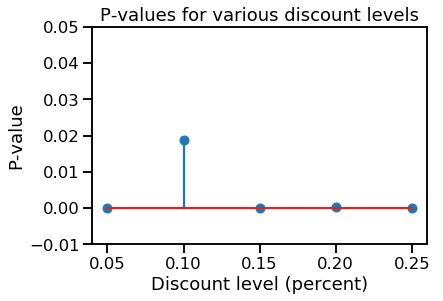

In [36]:
p_vals = [p_val_5, p_val_10, p_val_15, p_val_20, p_val_25]
discounts = [0.05, 0.1, 0.15, 0.2, 0.25]

plt.stem(discounts, p_vals)
plt.ylim(-.01, .05)
plt.title('P-values for various discount levels')
plt.xlabel('Discount level (percent)')
plt.ylabel('P-value')
plt.show();

The effect of discount on quantity is significant even at the 5% level. How big is the effect at each discount level?

In [37]:
mean_no_discount = np.mean(df_no_discount.Quantity)
mean_5_discount = np.mean(df_discount_5.Quantity)
mean_10_discount = np.mean(df_discount_10.Quantity)
mean_15_discount = np.mean(df_discount_15.Quantity)
mean_20_discount = np.mean(df_discount_20.Quantity)
mean_25_discount = np.mean(df_discount_25.Quantity)

In [38]:
print('5% effect size:', mean_5_discount - mean_no_discount)
print('10% effect size:', mean_10_discount - mean_no_discount)
print('15% effect size:', mean_15_discount - mean_no_discount)
print('20% effect size:', mean_20_discount - mean_no_discount)
print('25% effect size:', mean_25_discount - mean_no_discount)

5% effect size: 6.295548851813088
10% effect size: 3.521732260655458
15% effect size: 6.666903646097818
20% effect size: 5.309582761499172
25% effect size: 6.5249977812620195


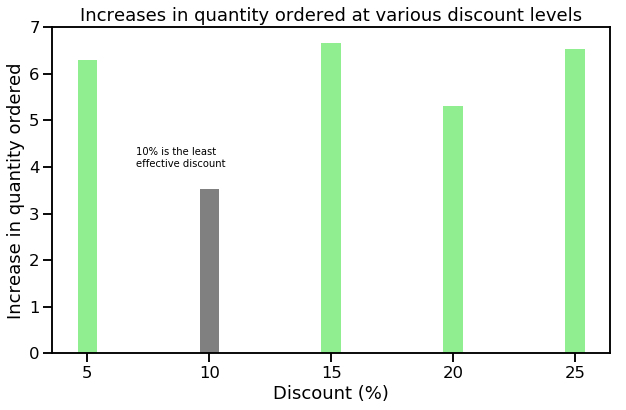

In [39]:
levels = [5, 10, 15, 20, 25]
means = [mean_5_discount, mean_10_discount, mean_15_discount, mean_20_discount, mean_25_discount]
mean_diffs = [mean - mean_no_discount for mean in means]

plt.figure(figsize=(10, 6))
plt.bar(levels, mean_diffs, color='lightgreen')
plt.bar(x=10, height = mean_10_discount-mean_no_discount, color='gray')
plt.xlabel('Discount (%)')
plt.ylabel('Increase in quantity ordered')
plt.title('Increases in quantity ordered at various discount levels')
plt.text(x=7, y=4, s='10% is the least\neffective discount')
plt.show();

# Hypothesis test 2

_NB: I think this one may be a little obvious: if discounting increases the quantity ordered of a particular product, it is likely to increase the size of each order overall. Maybe instead, at the end, do a test to see which is the most effective product to discount (after seeing which product category is most effective)._


If there is a discount on any item in an order, do people order more overall? I.e., if I put a discount on a very popular item, will people add on other items to their orders?

H0: mean total quantity for orders with no discounts == mean total quantity for orders with discounts

Ha: mean total quantity for orders with no discounts < mean total quantity for orders with discounts

In [40]:
# Establish alpha and power for this test
alpha = 0.05

power = 0.8

In [41]:
# Add a boolean column to indicate where a discount has been applied
df_2 = df.copy()
df_2['Discount_bool'] = df_2.apply(lambda row: 1 if row.Discount > 0 else 0, axis=1)
df_2.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Discount_bool
0,10248/11,10248,11,14.0,12,0.0,0
1,10248/42,10248,42,9.8,10,0.0,0
2,10248/72,10248,72,34.8,5,0.0,0
3,10249/14,10249,14,18.6,9,0.0,0
4,10249/51,10249,51,42.4,40,0.0,0


In [42]:
# Group by order
group_by_discount_bool = pd.DataFrame(df_2.groupby('OrderId')['Discount_bool'].sum())
ids_no_disc = group_by_discount_bool[group_by_discount_bool.Discount_bool == 0]
ids_no_disc = list(ids_no_disc.index)
ids_no_disc

[10248,
 10249,
 10253,
 10255,
 10256,
 10257,
 10259,
 10261,
 10265,
 10268,
 10270,
 10271,
 10272,
 10274,
 10276,
 10277,
 10278,
 10280,
 10281,
 10282,
 10283,
 10286,
 10289,
 10290,
 10292,
 10293,
 10294,
 10295,
 10296,
 10297,
 10299,
 10300,
 10301,
 10302,
 10304,
 10306,
 10307,
 10308,
 10309,
 10310,
 10311,
 10312,
 10313,
 10315,
 10316,
 10317,
 10318,
 10319,
 10320,
 10321,
 10322,
 10323,
 10325,
 10326,
 10328,
 10331,
 10334,
 10337,
 10338,
 10345,
 10349,
 10354,
 10355,
 10356,
 10360,
 10362,
 10363,
 10364,
 10365,
 10366,
 10367,
 10374,
 10375,
 10378,
 10381,
 10382,
 10383,
 10384,
 10386,
 10387,
 10389,
 10391,
 10392,
 10394,
 10396,
 10399,
 10400,
 10401,
 10402,
 10405,
 10407,
 10408,
 10409,
 10410,
 10413,
 10415,
 10416,
 10418,
 10422,
 10423,
 10426,
 10427,
 10428,
 10432,
 10433,
 10435,
 10437,
 10439,
 10441,
 10442,
 10444,
 10445,
 10447,
 10448,
 10449,
 10455,
 10457,
 10458,
 10462,
 10463,
 10466,
 10467,
 10468,
 10470,
 10471,


In [43]:
ids_with_disc = group_by_discount_bool[group_by_discount_bool.Discount_bool > 0]
ids_with_disc = list(ids_with_disc.index)
ids_with_disc

[10250,
 10251,
 10252,
 10254,
 10258,
 10260,
 10262,
 10263,
 10264,
 10266,
 10267,
 10269,
 10273,
 10275,
 10279,
 10284,
 10285,
 10287,
 10288,
 10291,
 10298,
 10303,
 10305,
 10314,
 10324,
 10327,
 10329,
 10330,
 10332,
 10333,
 10335,
 10336,
 10339,
 10340,
 10341,
 10342,
 10343,
 10344,
 10346,
 10347,
 10348,
 10350,
 10351,
 10352,
 10353,
 10357,
 10358,
 10359,
 10361,
 10368,
 10369,
 10370,
 10371,
 10372,
 10373,
 10376,
 10377,
 10379,
 10380,
 10385,
 10388,
 10390,
 10393,
 10395,
 10397,
 10398,
 10403,
 10404,
 10406,
 10411,
 10412,
 10414,
 10417,
 10419,
 10420,
 10421,
 10424,
 10425,
 10429,
 10430,
 10431,
 10434,
 10436,
 10438,
 10440,
 10443,
 10446,
 10450,
 10451,
 10452,
 10453,
 10454,
 10456,
 10459,
 10460,
 10461,
 10464,
 10465,
 10469,
 10472,
 10475,
 10476,
 10477,
 10478,
 10483,
 10485,
 10487,
 10488,
 10489,
 10491,
 10492,
 10493,
 10496,
 10500,
 10506,
 10507,
 10510,
 10511,
 10512,
 10513,
 10515,
 10516,
 10519,
 10522,
 10523,


In [44]:
# Split by whether discount has been applied to any item in order or not
orders_discount = df_2[df_2.OrderId.isin(ids_with_disc)]
orders_no_discount = df_2[df_2.OrderId.isin(ids_no_disc)]

In [45]:
orders_discount.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Discount_bool
5,10250/41,10250,41,7.7,10,0.00,0
6,10250/51,10250,51,42.4,35,0.15,1
7,10250/65,10250,65,16.8,15,0.15,1
8,10251/22,10251,22,16.8,6,0.05,1
9,10251/57,10251,57,15.6,15,0.05,1


In [46]:
# Group by order number
orders_discount = orders_discount.groupby('OrderId')['Quantity'].sum()
print(orders_discount.head())
print(len(orders_discount))

OrderId
10250     60
10251     41
10252    105
10254     57
10258    121
Name: Quantity, dtype: int64
380


In [47]:
orders_no_discount = orders_no_discount.groupby('OrderId')['Quantity'].sum()
print(orders_no_discount.head())
print(len(orders_no_discount))

OrderId
10248     27
10249     49
10253    102
10255    110
10256     27
Name: Quantity, dtype: int64
450


In [48]:
# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(orders_discount, orders_no_discount)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Null hypothesis rejected (p_value = 2.9253389710603983e-09)


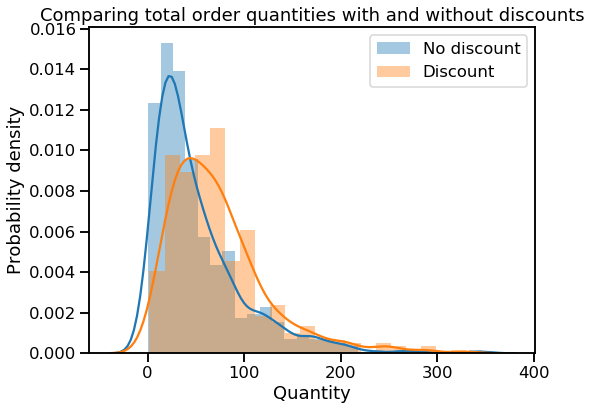

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(orders_no_discount, label='No discount')
sns.distplot(orders_discount, label='Discount')
plt.legend()
plt.title('Comparing total order quantities with and without discounts')
plt.ylabel('Probability density')
plt.show();

In [50]:
effect_size = round(np.mean(orders_discount) - np.mean(orders_no_discount), 2)

print('The effect size is {} more products per order on average when discounts are applied.'.format(effect_size))

The effect size is 20.5 more products per order on average when discounts are applied.


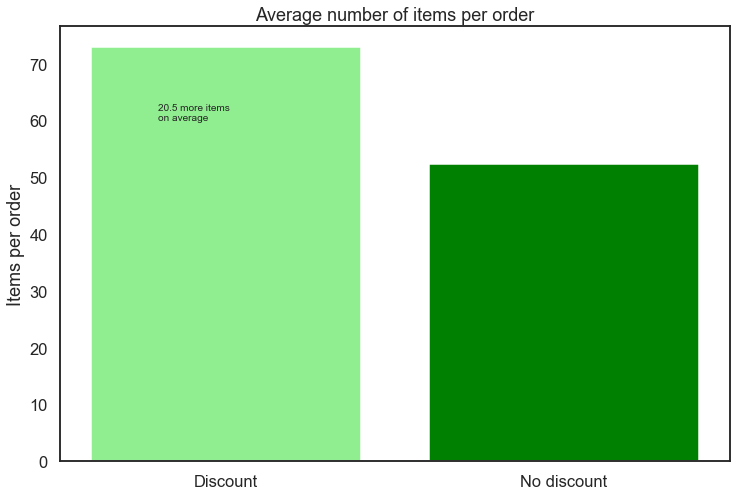

In [51]:
y_values = [np.mean(orders_discount), np.mean(orders_no_discount)]
x_values = ['Discount', 'No discount']

sns.set_style('white')
plt.figure(figsize=(12,8))
plt.bar(x_values, y_values, color='green')
plt.bar(x_values[0], y_values[0], color='lightgreen')
plt.text(x=-0.20, y=60, s='20.5 more items\non average')
plt.ylabel('Items per order')
plt.title('Average number of items per order')
plt.show();

# Hypothesis test 3

Does discounting raise the overall value of an order? In other words, are discounts encouraging people to buy more but cheaper items (leading to increased order quantities but not increased order dollar amounts), or does discounting increase the dollar amount v. orders with no discounts applied?

H0: mean order value without discounts == mean order value with discounts

Ha: mean order value without discounts < mean order value with discounts

In [52]:
# Add a column to calculate unit price * quantity for each product in an order
df_3 = df_2.copy()
df_3['ProductTotal'] = df_3.UnitPrice * df_3.Quantity
for index in range(len(df_3)):
    if df_3.loc[index, 'Discount_bool'] != 0:
        df_3['ProductTotal'] = df_3.UnitPrice * df_3.Quantity * (1-df_3.Discount)
# df_3['ProductTotal'] = [df_3.UnitPrice * df_3.Quantity if df_3.Discount_bool == 0 else df_3.UnitPrice * df_3.Quantity * (1-df_3.Discount)]
df_3.head(10)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Discount_bool,ProductTotal
0,10248/11,10248,11,14.0,12,0.00,0,168.00
1,10248/42,10248,42,9.8,10,0.00,0,98.00
2,10248/72,10248,72,34.8,5,0.00,0,174.00
3,10249/14,10249,14,18.6,9,0.00,0,167.40
4,10249/51,10249,51,42.4,40,0.00,0,1696.00
5,10250/41,10250,41,7.7,10,0.00,0,77.00
6,10250/51,10250,51,42.4,35,0.15,1,1261.40
7,10250/65,10250,65,16.8,15,0.15,1,214.20
8,10251/22,10251,22,16.8,6,0.05,1,95.76
9,10251/57,10251,57,15.6,15,0.05,1,222.30


In [53]:
df_3.head(20)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Discount_bool,ProductTotal
0,10248/11,10248,11,14.0,12,0.00,0,168.00
1,10248/42,10248,42,9.8,10,0.00,0,98.00
2,10248/72,10248,72,34.8,5,0.00,0,174.00
3,10249/14,10249,14,18.6,9,0.00,0,167.40
4,10249/51,10249,51,42.4,40,0.00,0,1696.00
5,10250/41,10250,41,7.7,10,0.00,0,77.00
6,10250/51,10250,51,42.4,35,0.15,1,1261.40
7,10250/65,10250,65,16.8,15,0.15,1,214.20
8,10251/22,10251,22,16.8,6,0.05,1,95.76
9,10251/57,10251,57,15.6,15,0.05,1,222.30


In [54]:
# Split by discount/no discount
totals_no_discounts = df_3[df_3.OrderId.isin(ids_no_disc)]
totals_with_discounts = df_3[df_3.OrderId.isin(ids_with_disc)]

In [55]:
# Group by order and sum the product totals to get each order's total value
totals_no_discounts = totals_no_discounts.groupby('OrderId')['ProductTotal'].sum()

totals_with_discounts = totals_with_discounts.groupby('OrderId')['ProductTotal'].sum()


In [56]:
print(totals_no_discounts.head())
print(len(totals_no_discounts))
print(totals_with_discounts.head())
print(len(totals_with_discounts))

OrderId
10248     440.0
10249    1863.4
10253    1444.8
10255    2490.5
10256     517.8
Name: ProductTotal, dtype: float64
450
OrderId
10250    1552.60
10251     654.06
10252    3597.90
10254     556.62
10258    1614.88
Name: ProductTotal, dtype: float64
380


In [57]:
# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(totals_with_discounts, totals_no_discounts)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Null hypothesis rejected (p_value = 0.005626924599663519)


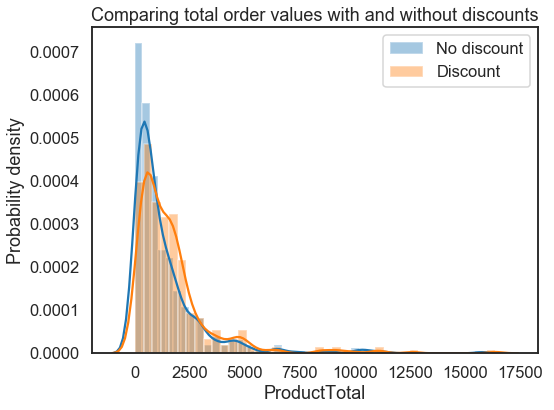

In [58]:
plt.figure(figsize=(8,6))
sns.distplot(totals_no_discounts, label='No discount')
sns.distplot(totals_with_discounts, label='Discount')
plt.legend()
plt.title('Comparing total order values with and without discounts')
plt.ylabel('Probability density')
plt.show();

In [59]:
effect_size = round(np.mean(totals_with_discounts) - np.mean(totals_no_discounts), 2)

print('The effect size is ${} more spent per order on average when discounts are applied.'.format(effect_size))

The effect size is $327.02 more spent per order on average when discounts are applied.


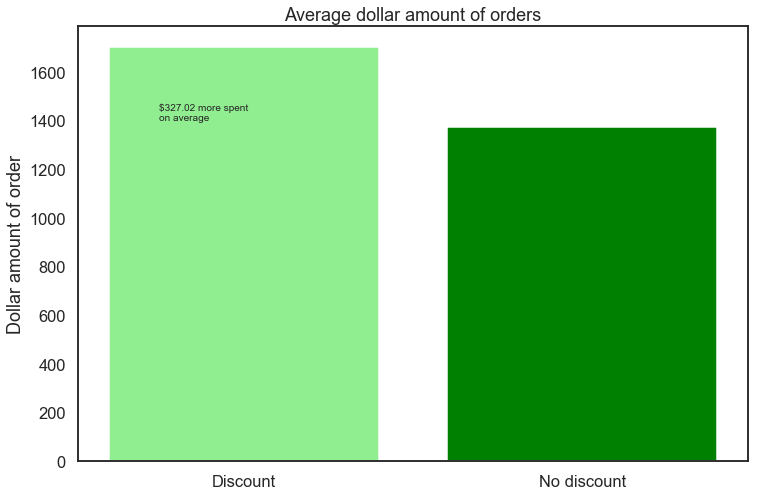

In [60]:
x_values = ['Discount', 'No discount']
y_values = [np.mean(totals_with_discounts), np.mean(totals_no_discounts)]

plt.figure(figsize=(12,8))
plt.bar(x_values, y_values, color='green')
plt.bar(x_values[0], y_values[0], color='lightgreen')
plt.text(x=-0.25, y=1400, s='$327.02 more spent\non average')
plt.ylabel('Dollar amount of order')
plt.title('Average dollar amount of orders')
plt.show();

# Hypothesis test 4

Does discounting have a bigger impact on total order values in one product category versus the others? In other words, is there a product category where discounting is more effective at raising the total value of an order?

**I've made a mistake: I didn't group by orders at any point. I probably can just redefine the question to be about total margin on a product in an order by category???**

Compare discount (all levels) v. no discount; for some categories/discount levels, there are <30 data points.


This is a one-tailed test.

H0: mean order value without discounts == mean order value with discounts

Ha: mean order value without discounts < mean order value with discounts

## Get and organize the data

In [61]:
cur.execute("""
    SELECT o.OrderID, o.ProductID, o.UnitPrice, o.Quantity, o.Discount,
        p.ProductName, c.ID AS CategoryID, c.CategoryName
    FROM OrderDetail o
        JOIN Product p
            ON o.ProductID = p.ID
        JOIN Category c
            ON p.CategoryID = c.ID
            ;""")
categories = pd.DataFrame(cur.fetchall())
categories.columns = [x[0] for x in cur.description]
categories.head()

,OrderId,ProductId,UnitPrice,Quantity,Discount,ProductName,CategoryID,CategoryName
0,10248,11,14.0,12,0.0,Queso Cabrales,4,Dairy Products
1,10248,42,9.8,10,0.0,Singaporean Hokkien Fried Mee,5,Grains/Cereals
2,10248,72,34.8,5,0.0,Mozzarella di Giovanni,4,Dairy Products
3,10249,14,18.6,9,0.0,Tofu,7,Produce
4,10249,51,42.4,40,0.0,Manjimup Dried Apples,7,Produce


In [62]:
categories['ProductTotal'] = categories.UnitPrice * categories.Quantity
for index in range(len(df_3)):
    if categories.loc[index, 'Discount'] != 0:
        categories['ProductTotal'] = categories.UnitPrice * categories.Quantity * (1-categories.Discount)
# df_3['ProductTotal'] = [df_3.UnitPrice * df_3.Quantity if df_3.Discount_bool == 0 else df_3.UnitPrice * df_3.Quantity * (1-df_3.Discount)]
categories.head(10)

,OrderId,ProductId,UnitPrice,Quantity,Discount,ProductName,CategoryID,CategoryName,ProductTotal
0,10248,11,14.0,12,0.00,Queso Cabrales,4,Dairy Products,168.00
1,10248,42,9.8,10,0.00,Singaporean Hokkien Fried Mee,5,Grains/Cereals,98.00
2,10248,72,34.8,5,0.00,Mozzarella di Giovanni,4,Dairy Products,174.00
3,10249,14,18.6,9,0.00,Tofu,7,Produce,167.40
4,10249,51,42.4,40,0.00,Manjimup Dried Apples,7,Produce,1696.00
5,10250,41,7.7,10,0.00,Jack's New England Clam Chowder,8,Seafood,77.00
6,10250,51,42.4,35,0.15,Manjimup Dried Apples,7,Produce,1261.40
7,10250,65,16.8,15,0.15,Louisiana Fiery Hot Pepper Sauce,2,Condiments,214.20
8,10251,22,16.8,6,0.05,Gustaf's Knäckebröd,5,Grains/Cereals,95.76
9,10251,57,15.6,15,0.05,Ravioli Angelo,5,Grains/Cereals,222.30


In [109]:
categories.ProductId.value_counts()[:10]

59    54
31    51
24    51
60    51
56    50
62    48
41    47
75    46
2     44
16    43
Name: ProductId, dtype: int64

In [103]:

categories.groupby('CategoryName').count()

,OrderId,ProductId,UnitPrice,Quantity,Discount,ProductName,CategoryID,ProductTotal
CategoryName,,,,,,,,
Beverages,404,404,404,404,404,404,404,404
Condiments,216,216,216,216,216,216,216,216
Confections,334,334,334,334,334,334,334,334
Dairy Products,366,366,366,366,366,366,366,366
Grains/Cereals,196,196,196,196,196,196,196,196
Meat/Poultry,173,173,173,173,173,173,173,173
Produce,136,136,136,136,136,136,136,136
Seafood,330,330,330,330,330,330,330,330


In [63]:
dairy_no_discount = categories[(categories.CategoryID == 4) & (categories.Discount == 0)]
print(len(dairy_no_discount))
dairy_with_discount = categories[(categories.CategoryID == 4) & (categories.Discount != 0)]
print(len(dairy_with_discount))

224
142


In [64]:
tables

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [65]:
condiments_no_discount = categories[(categories.CategoryID == 2) & (categories.Discount == 0)]
print(len(condiments_no_discount))
condiments_with_discount = categories[(categories.CategoryID == 2) & (categories.Discount != 0)]
print(len(condiments_with_discount))

131
85


In [66]:
beverages_no_discount = categories[(categories.CategoryID == 1) & (categories.Discount == 0)]
print(len(beverages_no_discount))
beverages_with_discount = categories[(categories.CategoryID == 1) & (categories.Discount != 0)]
print(len(beverages_with_discount))

246
158


In [67]:
confections_no_discount = categories[(categories.CategoryID == 3) & (categories.Discount == 0)]
print(len(confections_no_discount))
confections_with_discount = categories[(categories.CategoryID == 3) & (categories.Discount != 0)]
print(len(confections_with_discount))

200
134


In [68]:
grains_no_discount = categories[(categories.CategoryID == 5) & (categories.Discount == 0)]
print(len(grains_no_discount))
grains_with_discount = categories[(categories.CategoryID == 5) & (categories.Discount != 0)]
print(len(grains_with_discount))

133
63


In [69]:
meat_no_discount = categories[(categories.CategoryID == 6) & (categories.Discount == 0)]
print(len(meat_no_discount))
meat_with_discount = categories[(categories.CategoryID == 6) & (categories.Discount != 0)]
print(len(meat_with_discount))

97
76


In [70]:
produce_no_discount = categories[(categories.CategoryID == 7) & (categories.Discount == 0)]
print(len(produce_no_discount))
produce_with_discount = categories[(categories.CategoryID == 7) & (categories.Discount != 0)]
print(len(produce_with_discount))

91
45


In [71]:
seafood_no_discount = categories[(categories.CategoryID == 8) & (categories.Discount == 0)]
print(len(seafood_no_discount))
seafood_with_discount = categories[(categories.CategoryID == 8) & (categories.Discount != 0)]
print(len(seafood_with_discount))

195
135


In [74]:
df.ProductId.value_counts()[:10]

59    54
31    51
24    51
60    51
56    50
62    48
41    47
75    46
2     44
16    43
Name: ProductId, dtype: int64

In [145]:
top_products = [59, 31, 24, 60, 56, 62, 41, 75, 2, 16]

tops = categories.loc[categories['ProductId'].isin(top_products)]
tops.groupby('ProductId')['Quantity'].sum()

AttributeError: 'list' object has no attribute 'is_unique'

In [113]:
tops.head()

,OrderId,ProductId,UnitPrice,Quantity,Discount,ProductName,CategoryID,CategoryName,ProductTotal
5,10250,41,7.7,10,0.00,Jack's New England Clam Chowder,8,Seafood,77.0
13,10252,60,27.2,40,0.00,Camembert Pierrot,4,Dairy Products,1088.0
14,10253,31,10.0,20,0.00,Gorgonzola Telino,4,Dairy Products,200.0
17,10254,24,3.6,15,0.15,Guaraná Fantástica,1,Beverages,45.9
20,10255,2,15.2,20,0.00,Chang,1,Beverages,304.0


In [144]:
data = tops.groupby('ProductName')['Quantity'].sum()
type(data)

# tops_2 = pd.DataFrame(data)
# tops_2.columns = ['ProductName', 'TotalQuantity']
# tops_2

AttributeError: 'list' object has no attribute 'is_unique'

In [132]:
y = list(tops.ProductName.unique())
x = list(tops.groupby('ProductName')['Quantity'].sum())

In [133]:
y

["Jack's New England Clam Chowder",
 'Camembert Pierrot',
 'Gorgonzola Telino',
 'Guaraná Fantástica',
 'Chang',
 'Pavlova',
 'Raclette Courdavault',
 'Tarte au sucre',
 'Gnocchi di nonna Alice',
 'Rhönbräu Klosterbier']

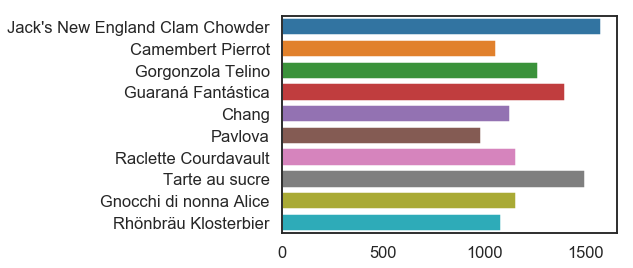

In [138]:
sns.barplot(x, y, orient='h');

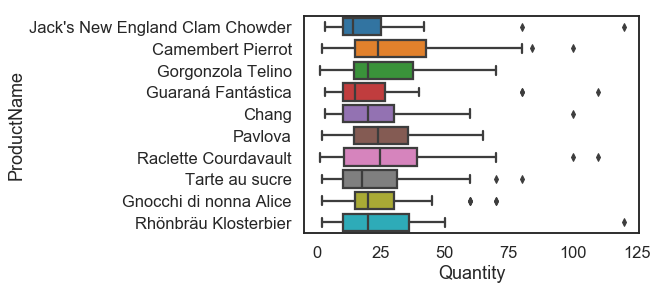

In [117]:
sns.boxplot(tops.Quantity, tops.ProductName, orient='h')

## Run Welch's t-tests for each category

### Beverages

In [83]:
# Set category
category = 'Beverages'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(beverages_no_discount.ProductTotal, 
                    beverages_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Fail to reject null hypothesis (p_value = 0.2742867834952314)


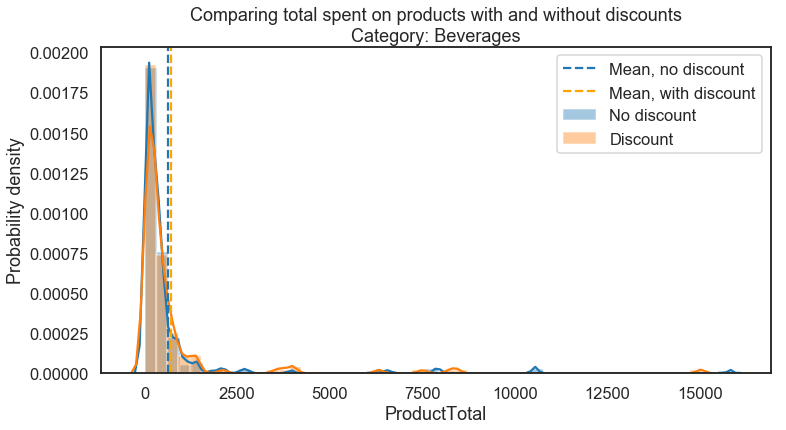

In [84]:
plt.figure(figsize=(12,6))
sns.distplot(beverages_no_discount.ProductTotal, label='No discount')
sns.distplot(beverages_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(beverages_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(beverages_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [85]:
effect_size = round(np.mean(beverages_with_discount.ProductTotal) - np.mean(beverages_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} more spent on a product when discounts are applied.'.format(category, effect_size))

For the Beverages category, the effect size is $104.44 more spent on a product when discounts are applied.


### Condiments

In [86]:
# Set category
category = 'Condiments'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(condiments_no_discount.ProductTotal, 
                    condiments_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Fail to reject null hypothesis (p_value = 0.13922548311041671)


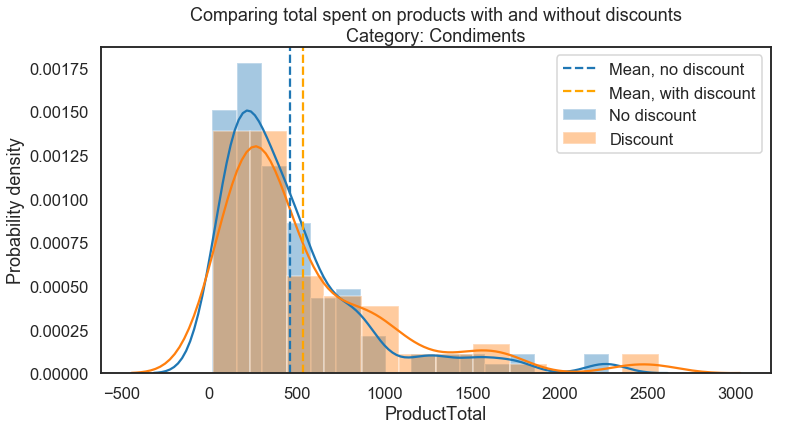

In [87]:
plt.figure(figsize=(12,6))
sns.distplot(condiments_no_discount.ProductTotal, label='No discount')
sns.distplot(condiments_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(condiments_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(condiments_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [88]:
effect_size = round(np.mean(condiments_with_discount.ProductTotal) - np.mean(condiments_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} more spent on a product when discounts are applied.'.format(category, effect_size))

For the Condiments category, the effect size is $72.51 more spent on a product when discounts are applied.


### Confections

In [89]:
# Set category
category = 'Confections'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(confections_no_discount.ProductTotal, 
                    confections_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Fail to reject null hypothesis (p_value = 0.09751474732308574)


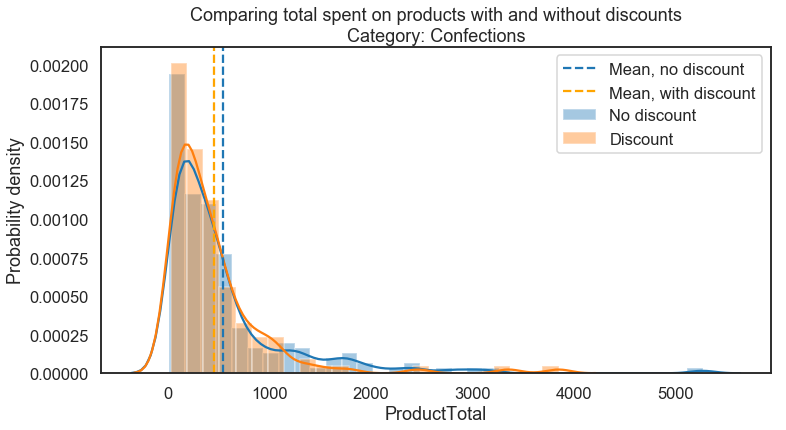

In [90]:
plt.figure(figsize=(12,6))
sns.distplot(confections_no_discount.ProductTotal, label='No discount')
sns.distplot(confections_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(confections_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(confections_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [91]:
effect_size = round(np.mean(confections_with_discount.ProductTotal) - np.mean(confections_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} less spent on a product when discounts are applied.'.format(category, effect_size))

For the Confections category, the effect size is $-86.17 less spent on a product when discounts are applied.


### Dairy Products

In [92]:
# Set category
category = 'Dairy Products'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(dairy_no_discount.ProductTotal, 
                    dairy_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Fail to reject null hypothesis (p_value = 0.11943217533557837)


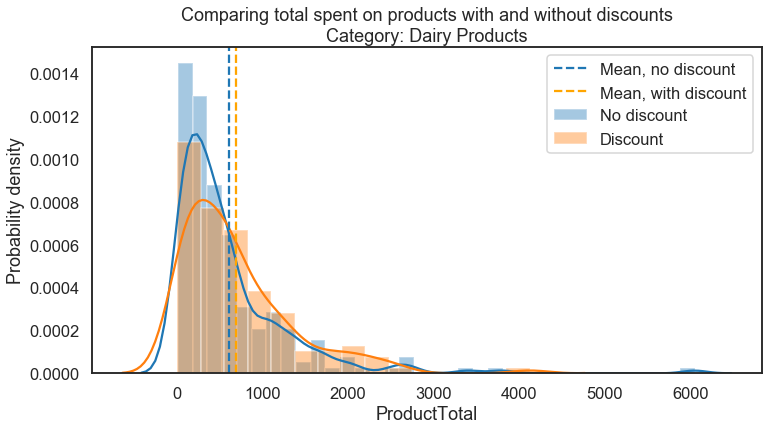

In [93]:
plt.figure(figsize=(12,6))
sns.distplot(dairy_no_discount.ProductTotal, label='No discount')
sns.distplot(dairy_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(dairy_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(dairy_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [94]:
effect_size = round(np.mean(dairy_with_discount.ProductTotal) - np.mean(dairy_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} more spent on a product when discounts are applied.'.format(category, effect_size))

For the Dairy Products category, the effect size is $86.14 more spent on a product when discounts are applied.


### Grains/Cereals

In [95]:
# Set category
category = 'Grains/Cereals'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(grains_no_discount.ProductTotal, 
                    grains_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Fail to reject null hypothesis (p_value = 0.3604068072243529)


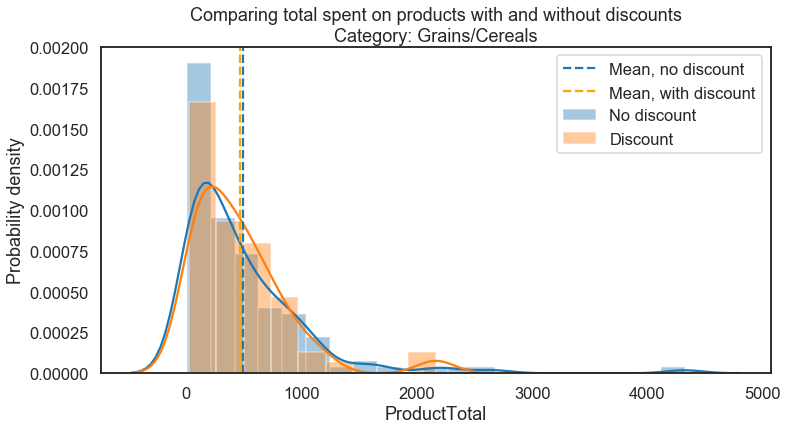

In [96]:
plt.figure(figsize=(12,6))
sns.distplot(grains_no_discount.ProductTotal, label='No discount')
sns.distplot(grains_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(grains_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(grains_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [97]:
effect_size = round(np.mean(grains_with_discount.ProductTotal) - np.mean(grains_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} less spent on a product when discounts are applied.'.format(category, effect_size))

For the Grains/Cereals category, the effect size is $-26.41 less spent on a product when discounts are applied.


### Meat/Poultry

In [98]:
# Set category
category = 'Meat/Poultry'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(meat_no_discount.ProductTotal, 
                    meat_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

Fail to reject null hypothesis (p_value = 0.36722854515948544)


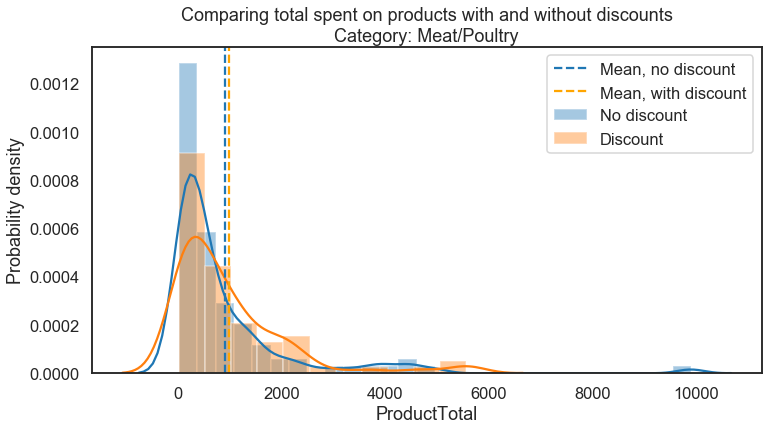

In [99]:
plt.figure(figsize=(12,6))
sns.distplot(meat_no_discount.ProductTotal, label='No discount')
sns.distplot(meat_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(meat_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(meat_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [ ]:
effect_size = round(np.mean(meat_with_discount.ProductTotal) - np.mean(meat_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} more spent on a product when discounts are applied.'.format(category, effect_size))

### Produce

In [ ]:
# Set category
category = 'Produce'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(produce_no_discount.ProductTotal, 
                    produce_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(produce_no_discount.ProductTotal, label='No discount')
sns.distplot(produce_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(produce_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(produce_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [ ]:
effect_size = round(np.mean(produce_with_discount.ProductTotal) - np.mean(produce_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} more spent on a product when discounts are applied.'.format(category, effect_size))

### Seafood

In [ ]:
# Set category
category = 'Seafood'

# Perform Welch's t-test on Quantity in the two datasets
p_value = p_value_welch_ttest(seafood_no_discount.ProductTotal, 
                    seafood_with_discount.ProductTotal)

if p_value < alpha:
    print('Null hypothesis rejected (p_value = {})'.format(p_value))
else:
    print('Fail to reject null hypothesis (p_value = {})'.format(p_value))

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(seafood_no_discount.ProductTotal, label='No discount')
sns.distplot(seafood_with_discount.ProductTotal, label='Discount')
plt.axvline(x=np.mean(seafood_no_discount.ProductTotal), linestyle='--', 
            label='Mean, no discount')
plt.axvline(x=np.mean(seafood_with_discount.ProductTotal), linestyle='--', 
            label='Mean, with discount', color='orange')
plt.legend()
plt.title('Comparing total spent on products with and without discounts\nCategory: {}'.format(category))
plt.ylabel('Probability density')
plt.show();

In [ ]:
effect_size = round(np.mean(seafood_with_discount.ProductTotal) - np.mean(seafood_no_discount.ProductTotal), 2)

print('For the {} category, the effect size is ${} more spent on a product when discounts are applied.'.format(category, effect_size))

**There is no category where discounting has a significant effect on how much people spent on a product while ordering.**

## Check with ANOVA

In [ ]:
categories_2 = categories.copy()
categories_2['Discount_bool'] = categories_2.apply(lambda row: 1 if row.Discount > 0 else 0, axis=1)

In [ ]:
categories_2_disc = categories_2[categories_2.Discount_bool == 1]
categories_2_disc = pd.DataFrame(categories_2_disc)
categories_2_no_disc = categories_2[categories_2.Discount_bool == 0]
print(type(categories_2_disc))

In [ ]:
categories_2_disc.head()

In [ ]:
# Check ANOVA for products with discounts
formula = 'ProductTotal ~ C(CategoryID)'

import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols(formula, categories_2_disc).fit()
table = sm.stats.anova_lm(lm, typ=2)

In [ ]:
table

In [ ]:
# Check ANOVA for products without discounts
# Need to do this on a version of the dataset that has Discount_bool
formula = 'ProductTotal ~ C(CategoryID)'

import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols(formula, categories_2_no_disc).fit()
table = sm.stats.anova_lm(lm, typ=2)

In [ ]:
table

I'm not convinced that this ANOVA is testing the same things as the category-by-category comparisons of discount/no discount I did manually above.

# Another one (to replace #2)?

Which is the best product to discount?

Among products that are offered with a discount, which ones get ordered most? Which ones 

In [ ]:
categories_2.head()

In [ ]:
categories_2.groupby('CategoryName')['Quantity'].sum()

In [ ]:
categories_2.groupby('CategoryName')['UnitPrice'].max()

In [ ]:
categories_2[categories_2.UnitPrice == 263.5]['Discount']

In [ ]:
categories_2[categories_2.UnitPrice == 123.79]['Discount']

# Is there a sig diff in mean unit price among the discount levels?

In [ ]:
discounts = [0.05, 0.1, 0.15, 0.2, 0.25]
for discount in discounts:
    mean_up = categories_2[categories_2.Discount == discount]['UnitPrice'].mean()
    print('Mean unit price at {}% discount level is {}.'.format(discount*100, mean_up))
print('Mean unit price at 0% discount level is {}.'.format(np.mean(df_no_discount.UnitPrice)))

In [ ]:
dfs = [df_discount_5, df_discount_10, df_discount_15, df_discount_20, df_discount_25]

for df in dfs:
    p_val = p_value_welch_ttest(df.UnitPrice, df_no_discount.UnitPrice)
    if p_val < 0.05:
        print('Null hypothesis rejected (p-value: {})'.format(p_val))
    else:
        print('Fail to reject null hypothesis (p-value: {})'.format(p_val))

15% is the only discount level where mean UnitPrice is different from the products with no discounts. 

In [ ]:
effect_size = round(np.mean(df_discount_15.UnitPrice) - np.mean(df_no_discount.UnitPrice), 2)

print('Mean unit price at the 15% discount level is ${} less than the mean unit price for products with no discounts.'.format(effect_size))

# SQL problem

In [ ]:
cur.execute("""
    SELECT *
    FROM "Order";""")
df_test = pd.DataFrame(cur.fetchall())
df_test.columns = [x[0] for x in cur.description]
df_test.head()

In [ ]:
cur.execute("""
    SELECT name
    FROM sqlite_master
    WHERE type = 'table';""")
names = pd.DataFrame(cur.fetchall())
names.columns = [x[0] for x in cur.description]
names

# Viz for feedback

In [ ]:
levels = [5, 10, 15, 20, 25]
means = [mean_5_discount, mean_10_discount, mean_15_discount, mean_20_discount, mean_25_discount]
mean_diffs = [mean - mean_no_discount for mean in means]

plt.figure(figsize=(10, 6))
plt.bar(levels, mean_diffs, color='lightgreen')
plt.bar(x=10, height = mean_10_discount-mean_no_discount, color='gray')
plt.xlabel('Discount (%)')
plt.ylabel('Increase in quantity ordered')
plt.title('Increases in quantity ordered at various discount levels')
plt.text(x=7, y=4, s='10% is the least\neffective discount')
plt.show();

In [ ]:
y_values = [np.mean(orders_discount), np.mean(orders_no_discount)]
x_values = ['Discount', 'No discount']

sns.set_style('white')
plt.figure(figsize=(12,8))
plt.bar(x_values, y_values, color='green')
plt.bar(x_values[0], y_values[0], color='lightgreen')
plt.text(x=-0.20, y=60, s='20.5 more items\non average')
plt.ylabel('Items per order')
plt.title('Average number of items per order')
plt.show();

In [ ]:
sns.distplot(df_discount.Quantity)

In [ ]:
sns.distplot(df_no_discount.Quantity)

In [ ]:
quantities = df.Quantity

sample_means = []
for n in range(100):
    choice = np.random.choice(quantities, 30)
    sample_means.append(np.mean(choice))

sns.distplot(sample_means)

In [ ]:
cats = ['Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood']
vols = [9532, 5298, 7906, 9149, 4562, 4199, 2990, 7681]
revs = [267868, 106047, 167357, 234507, 95745, 163022, 99985, 131262]

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

In [ ]:
import pandas as pd
import numpy as np

In [28]:
df = pd.DataFrame(list(zip(cats, vols, revs)), columns=['cat', 'vol', 'rev'])
df.head()

,cat,vol,rev
0,Beverages,9532,267868
1,Condiments,5298,106047
2,Confections,7906,167357
3,Dairy Products,9149,234507
4,Grains/Cereals,4562,95745


In [16]:
cat_vol = df.drop('rev', axis=1)
cat_vol.sort_values(by='vol', ascending=True, inplace=True)
cat_vol

,cat,vol
6,Produce,2990
5,Meat/Poultry,4199
4,Grains/Cereals,4562
1,Condiments,5298
7,Seafood,7681
2,Confections,7906
3,Dairy Products,9149
0,Beverages,9532


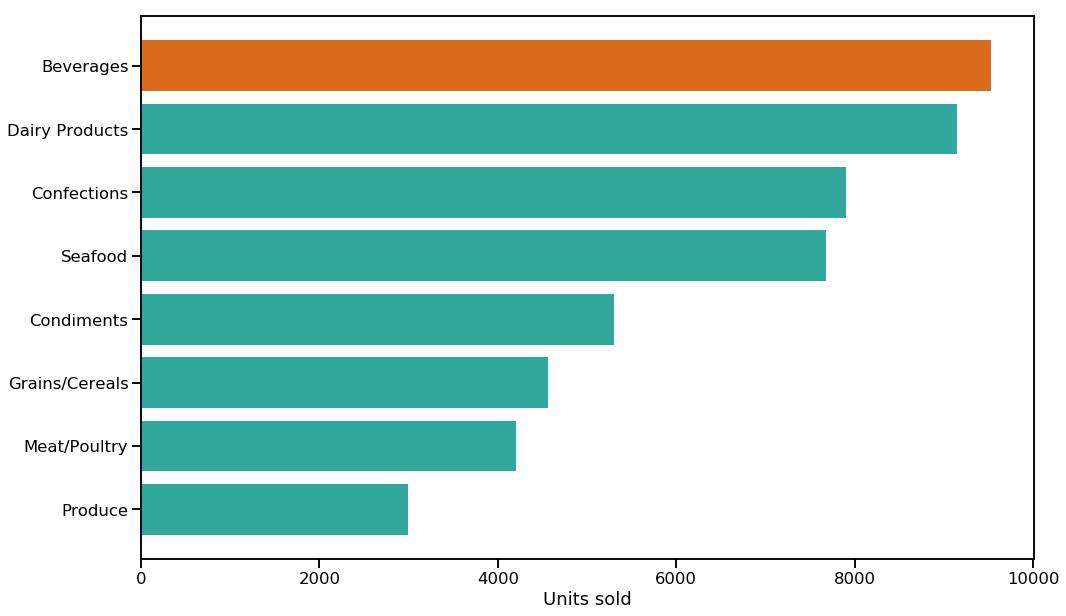

In [26]:
plt.figure(figsize=(16,10))
plt.barh(width=cat_vol.vol, y=cat_vol.cat, color='#32a89d')
plt.barh(width=cat_vol.vol[0], y=cat_vol.cat[0], color='#db6c1d')
plt.xlabel('Units sold')
plt.savefig('cats_units_sold.png')
plt.show();

In [30]:
cat_rev = df.drop('vol', axis=1)
cat_rev.sort_values(by='rev', ascending=True, inplace=True)
cat_rev

,cat,rev
4,Grains/Cereals,95745
6,Produce,99985
1,Condiments,106047
7,Seafood,131262
5,Meat/Poultry,163022
2,Confections,167357
3,Dairy Products,234507
0,Beverages,267868


In [39]:
locs = [0, 50000, 100000, 150000, 200000, 250000]
ticks = ['0', '50k', '100k', '150k', '200k', '250k']

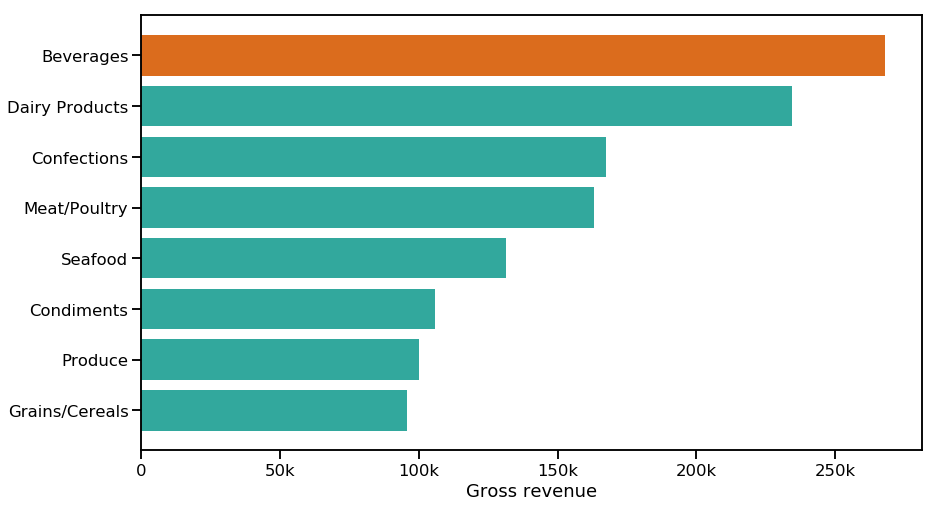

In [52]:
sns.set_context('talk')
plt.figure(figsize=(14,8))
plt.barh(width=cat_rev.rev, y=cat_rev.cat, color='#32a89d')
plt.barh(width=cat_rev.rev[0], y=cat_rev.cat[0], color='#db6c1d')
plt.xlabel('Gross revenue')
plt.xticks(locs, ticks)
plt.savefig('cats_gross_rev.png')
plt.show();